In [8]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import seaborn as sns
import pysam as sam
import pickle

import warnings

Populating the interactive namespace from numpy and matplotlib


In [9]:
# 将length做特征过三个模型的acc存pkl
DT_length_acc = [0.778,0.778,0.750,0.722,0.833,0.806,0.778,0.778,0.778,0.833,
                 0.833,0.750,0.750,0.778,0.833,0.778,0.778,0.694,0.778,0.694,0.778,0.833]
XGB_length_acc = [0.778,0.778,0.778,0.722,0.833,0.806,0.778,0.778,0.778,0.833,
                  0.833,0.750 ,0.750 ,0.778,0.833,0.778,0.778,0.722,0.778,0.694,0.778,0.888]
RF_length_acc = [0.778,0.778,0.778,0.722,0.806,0.806,0.778,0.778,0.778,0.833,
                 0.806,0.750,0.750,0.778,0.833,0.778,0.778,0.694,0.778,0.694,0.778,0.861]

Position = ["IDR1","IDR2","IDR3","IDR4","IDR5","IDR6","IDR7","IDR8","IDR9","IDR10","IDR11","IDR12","IDR13","IDR14","IDR15",
            "IDR16","IDR17","IDR18","IDR19","IDR20","IDR21","all_IDR"]

In [10]:
# 将disorder做特征过三个模型的acc存pkl
DT_disorder_acc =[0.750,0.778,0.750,0.722,0.750,0.806,0.806,0.638,0.833,0.750,
                0.806,0.750,0.833,0.806,0.750,0.750,0.666,0.778,0.722,0.750,0.778,0.944]
XGB_disorder_acc = [0.722,0.750,0.778,0.722,0.750,0.750,0.778,0.666,0.833,0.722,
                  0.778,0.722,0.833,0.750,0.694,0.778,0.638,0.722,0.611,0.666,0.694,0.944]
RF_disorder_acc = [0.666,0.778,0.778,0.694,0.806,0.833,0.750,0.666,0.833,0.750,
                0.778,0.750,0.806,0.750,0.694,0.750,0.722,0.750,0.694,0.694,0.722,0.916]

Position = ["IDR1","IDR2","IDR3","IDR4","IDR5","IDR6","IDR7","IDR8","IDR9","IDR10","IDR11","IDR12","IDR13","IDR14","IDR15",
            "IDR16","IDR17","IDR18","IDR19","IDR20","IDR21","all_IDR"]

In [11]:
Tier1 = []
Tier2 = []
Tier3 = []
for i in range(22):
    Tier1.append("DT")
    Tier2.append("XGBoost")
    Tier3.append("RF")

In [12]:
# Length_acc
all_Length_acc = []
all_Length_acc.extend(DT_length_acc)
all_Length_acc.extend(XGB_length_acc)
all_Length_acc.extend(RF_length_acc)
# Position
all_Position = []
all_Position.extend(Position)
all_Position.extend(Position)
all_Position.extend(Position)
# Tier
all_Tier = []
all_Tier.extend(Tier1)
all_Tier.extend(Tier2)
all_Tier.extend(Tier3)

print(len(all_Length_acc))
print(len(all_Position))
print(len(all_Tier))
data1_3 = [all_Length_acc,all_Position,all_Tier]
# 用字典设置DataFrame所需数据
dfData1_3 = { 
        'Acc':data1_3[0],
        'Position':data1_3[1],
        'Tier':data1_3[2],
    }
df1_3 = pd.DataFrame(dfData1_3) # 创建DataFrame

df1_3.to_excel('/home/dldx/R-H/code/classification/ML/plot/xlsx/acc/all_length_IDR_acc.xlsx',index=False) # 存表，

66
66
66


In [13]:
# Length_acc
all_Disorder_acc = []
all_Disorder_acc.extend(DT_disorder_acc)
all_Disorder_acc.extend(XGB_disorder_acc)
all_Disorder_acc.extend(RF_disorder_acc)
# Position
all_Position = []
all_Position.extend(Position)
all_Position.extend(Position)
all_Position.extend(Position)
# Tier
all_Tier = []
all_Tier.extend(Tier1)
all_Tier.extend(Tier2)
all_Tier.extend(Tier3)

print(len(all_Disorder_acc))
print(len(all_Position))
print(len(all_Tier))
data1_3 = [all_Disorder_acc,all_Position,all_Tier]
# 用字典设置DataFrame所需数据
dfData1_3 = { 
        'Acc':data1_3[0],
        'Position':data1_3[1],
        'Tier':data1_3[2],
    }
df1_3 = pd.DataFrame(dfData1_3) # 创建DataFrame

df1_3.to_excel('/home/dldx/R-H/code/classification/ML/plot/xlsx/acc/all_disorder_IDR_acc.xlsx',index=False) # 存表，

66
66
66


In [14]:
all_IDR_length_acc = pd.read_excel(r'/home/dldx/R-H/code/classification/ML/plot/xlsx/acc/all_length_IDR_acc.xlsx')

In [15]:
all_IDR_disorder_acc = pd.read_excel(r'/home/dldx/R-H/code/classification/ML/plot/xlsx/acc/all_disorder_IDR_acc.xlsx')

In [22]:
all_IDR_length_acc

,Acc,Position,Tier
0,0.778,IDR1,DT
1,0.778,IDR2,DT
2,0.750,IDR3,DT
3,0.722,IDR4,DT
4,0.833,IDR5,DT
...,...,...,...
61,0.638,IDR18,RF
62,0.778,IDR19,RF
63,0.694,IDR20,RF
64,0.778,IDR21,RF


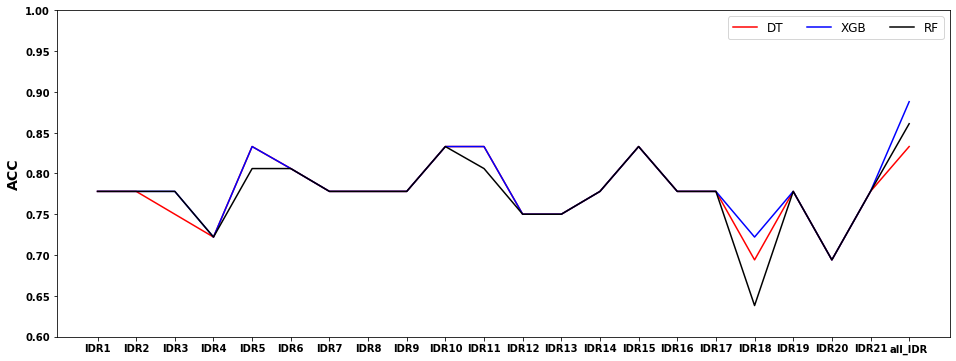

In [33]:
sns.set_context({'figure.figsize':[16, 6]})
fig =  sns.lineplot(x="Position", 
                y="Acc",
                data=all_IDR_length_acc,
                hue="Tier",
#                 order=["IDR1","IDR2","IDR3","IDR4","IDR5","IDR6","IDR7","IDR8","IDR9","IDR10",
#                        "IDR11","IDR12","IDR13","IDR14","IDR15","IDR16","IDR17","IDR18","IDR19","IDR20","IDR21"], 
                palette={"DT": "red", "XGB": "blue", "RF":"black"},
)
xlabel('')
ylim(0.60,1.00)
ylabel('ACC',weight='bold',fontsize=14)
xticks(weight='bold')
yticks(weight='bold')
plt.legend(loc="upper right",ncol=3,prop = {'size':12})

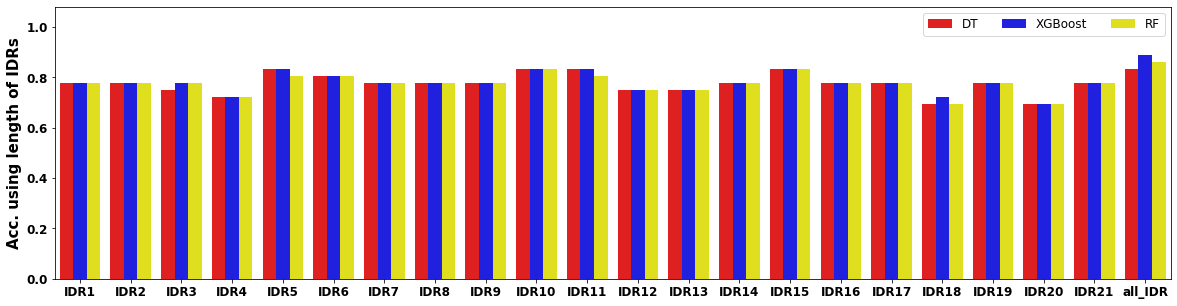

In [20]:
sns.set_context({'figure.figsize':[20, 5]})
fig =  sns.barplot(x="Position", 
                y="Acc",
                data=all_IDR_length_acc,
                hue="Tier",
#                 order=["IDR1","IDR2","IDR3","IDR4","IDR5","IDR6","IDR7","IDR8","IDR9","IDR10",
#                        "IDR11","IDR12","IDR13","IDR14","IDR15","IDR16","IDR17","IDR18","IDR19","IDR20","IDR21"], 
                palette={"DT": "red", "XGBoost": "blue", "RF":"yellow"},
                
)
xlabel('')
ylim(0.0,1.08)
ylabel('Acc. using length of IDRs',weight='bold',fontsize=15)
xticks(weight='bold',fontsize=12)
yticks(weight='bold',fontsize=12)
plt.legend(loc="upper right",ncol=3,prop = {'size':12})
fig.get_figure().savefig("/home/dldx/R-H/code/classification/ML/plot/ACC/length_bar_ACC.jpg",dpi=900)

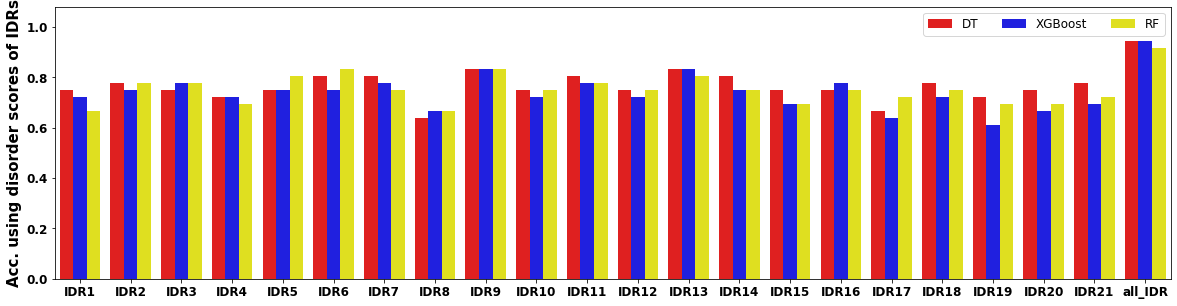

In [21]:
sns.set_context({'figure.figsize':[20, 5]})
fig =  sns.barplot(x="Position", 
                y="Acc",
                data=all_IDR_disorder_acc,
                hue="Tier",
#                 order=["IDR1","IDR2","IDR3","IDR4","IDR5","IDR6","IDR7","IDR8","IDR9","IDR10",
#                        "IDR11","IDR12","IDR13","IDR14","IDR15","IDR16","IDR17","IDR18","IDR19","IDR20","IDR21"], 
                palette={"DT": "red", "XGBoost": "blue", "RF":"yellow"},
                
)
xlabel('')
ylim(0.0,1.08)
ylabel('Acc. using disorder scores of IDRs',weight='bold',fontsize=15)
xticks(weight='bold',fontsize=12)
yticks(weight='bold',fontsize=12)
plt.legend(loc="upper right",ncol=3,prop = {'size':12})
fig.get_figure().savefig("/home/dldx/R-H/code/classification/ML/plot/ACC/disorder_bar_ACC.jpg",dpi=900)